#### Case-1

In [47]:
import pandas as pd

In [48]:
overall_survival = pd.read_csv("Overall Survival.csv")
progression_free_survival = pd.read_csv("Progression-Free Survival.csv")

In [49]:
overall_survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   0                      42 non-null     int64 
 1   23853158174467604; 99  42 non-null     object
 2   8370447638426          42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [50]:
overall_survival.head()

,0,23853158174467604; 99,8370447638426
0,0,5995202931376373; 99,64229213231187
1,0,9277386780484895; 99,35311460935878
2,1,3545335819355926; 98,71139210846208
3,1,7683851847924843; 97,63722442047059
4,2,1683762448138757; 96,58109273296022


In [51]:
overall_survival["column0"] = overall_survival["0"]
overall_survival[['column1', 'column2']] = overall_survival['23853158174467604; 99'].str.split('; ', expand=True)
overall_survival["column3"] = overall_survival["8370447638426"]

columns_to_drop = ["0","23853158174467604; 99","8370447638426"]
overall_survival.drop(columns_to_drop,axis=1,inplace=True)

overall_survival["column3"] = overall_survival["column3"]/100000000000
overall_survival["column3"] = overall_survival["column3"].astype(int).astype(str)

overall_survival["time"] = overall_survival["column0"].astype(str)+"."+overall_survival["column1"].astype(str)
overall_survival.drop(["column0","column1"],axis=1,inplace=True)

overall_survival["SurvivalProbability"] = overall_survival["column2"]+"."+overall_survival["column3"]
overall_survival.drop(["column2","column3"],axis=1,inplace=True)

overall_survival['time'] = overall_survival['time'].astype(float).round()

overall_survival["SurvivalProbability"] =overall_survival["SurvivalProbability"].astype(float).round(3)
overall_survival = overall_survival.groupby("time")["SurvivalProbability"].mean().reset_index()
overall_survival.head()

,time,SurvivalProbability
0,1.0,99.235333
1,2.0,97.109000
2,3.0,94.871333
3,4.0,90.866000
4,5.0,88.994500


In [52]:
progression_free_survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   0                       54 non-null     int64 
 1   14050335838046513; 100  54 non-null     object
 2   04228569985989          54 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [53]:
progression_free_survival.head()

,0,14050335838046513; 100,04228569985989
0,0,5682212882868765; 99,82151647880035
1,0,8530837466207615; 98,97857945293664
2,1,1829419051901349; 97,2061538315893
3,1,4500336038160886; 95,92795021647754
4,1,786824964294984; 94,50633023238201


In [54]:
progression_free_survival["column0"] = progression_free_survival["0"]
progression_free_survival[['column1', 'column2']] = progression_free_survival['14050335838046513; 100'].str.split('; ', expand=True)
progression_free_survival["column3"] = progression_free_survival["04228569985989"]

columns_to_drop = ["0","14050335838046513; 100","04228569985989"]
progression_free_survival.drop(columns_to_drop,axis=1,inplace=True)

progression_free_survival["column3"] = progression_free_survival["column3"]/100000000000
progression_free_survival["column3"] = progression_free_survival["column3"].astype(int).astype(str)

progression_free_survival["time"] = progression_free_survival["column0"].astype(str)+"."+progression_free_survival["column1"].astype(str)
progression_free_survival.drop(["column0","column1"],axis=1,inplace=True)

progression_free_survival["SurvivalProbability"] = progression_free_survival["column2"]+"."+progression_free_survival["column3"]
progression_free_survival.drop(["column2","column3"],axis=1,inplace=True)

progression_free_survival['time'] = progression_free_survival['time'].astype(float).round()

progression_free_survival["SurvivalProbability"] = progression_free_survival["SurvivalProbability"].astype(float).round(3)
progression_free_survival = progression_free_survival.groupby("time")["SurvivalProbability"].mean().reset_index()
progression_free_survival.head()

,time,SurvivalProbability
0,1.0,97.98150
1,2.0,93.55500
2,3.0,88.55275
3,4.0,82.09600
4,5.0,77.51650


In [55]:
progression_free_survival.to_csv("final_progression.csv",index=False)
overall_survival.to_csv("final_overall.csv",index=False)

#### Case-2

##### Q1

In [56]:
import numpy as np
prob_1 = progression_free_survival["SurvivalProbability"].values
prob_2 = overall_survival["SurvivalProbability"].values

event_1 = []
event_2 = []

for i in range(len(progression_free_survival)):
    random_number = np.random.randint(0, 101)
    if random_number >= prob_1[i]:
        event_1.append(0)
        event_2.append(0)
    else:
        event_1.append(1)
        event_2.append(1)

In [57]:
data = {
    "OverallSurvivalTime":np.arange(1, 15),
    'OverallSurvivalEvent':event_1,
    'ProgressionFreeSurvivalTime': np.arange(1, 15),
    'ProgressionFreeSurvivalEvent':event_2,
}

In [58]:
from lifelines import KaplanMeierFitter

individual_data = pd.DataFrame()

df = pd.DataFrame(data)

def generate_km_data(event_times, event_types):
    km_data = pd.DataFrame(columns=['Time', 'Event'])
    km_data['Time'] = sorted(event_times)
    km_data['Event'] = [1 if event == 1 else 0 for event in event_types]  # Convert event types to 1 for event, 0 for censored
    return km_data

# Generate individual patient-level data for overall survival
overall_survival_km_data = generate_km_data(df['OverallSurvivalTime'], df['OverallSurvivalEvent'])

# Generate individual patient-level data for progression-free survival
progression_free_survival_km_data = generate_km_data(df['ProgressionFreeSurvivalTime'], df['ProgressionFreeSurvivalEvent'])

kmf = KaplanMeierFitter()
kmf.fit(overall_survival_km_data['Time'], event_observed=overall_survival_km_data['Event'])
kmf.fit(progression_free_survival_km_data['Time'], event_observed=progression_free_survival_km_data['Event'])


# Display individual patient-level data
print("Individual patient-level data for overall survival:")
print(overall_survival_km_data)
print("\nIndividual patient-level data for progression-free survival:")
print(progression_free_survival_km_data)

Individual patient-level data for overall survival:
    Time  Event
0      1      1
1      2      1
2      3      1
3      4      1
4      5      1
5      6      0
6      7      0
7      8      1
8      9      0
9     10      0
10    11      0
11    12      0
12    13      0
13    14      0

Individual patient-level data for progression-free survival:
    Time  Event
0      1      1
1      2      1
2      3      1
3      4      1
4      5      1
5      6      0
6      7      0
7      8      1
8      9      0
9     10      0
10    11      0
11    12      0
12    13      0
13    14      0


##### Q2

In [67]:
from lifelines import WeibullFitter, LogLogisticFitter, ExponentialFitter

survival_times = np.arange(1,15)
censoring_indicators = progression_free_survival_km_data["Event"]

weibull_fitter = WeibullFitter()
weibull_fitter.fit(survival_times, event_observed=(1-censoring_indicators))
loglogistic_fitter = LogLogisticFitter()
loglogistic_fitter.fit(survival_times, event_observed=(1-censoring_indicators))
exponential_fitter = ExponentialFitter()
exponential_fitter.fit(survival_times, event_observed=(1-censoring_indicators))

print("Weibull AIC:", weibull_fitter.AIC_)
print("Log-Logistic AIC:", loglogistic_fitter.AIC_)
print("Exponential AIC:", exponential_fitter.AIC_)

#lower aıc is better in our case we got best results with weibull.

Weibull AIC: 42.31330756980215
Log-Logistic AIC: 43.898232845130636
Exponential AIC: 59.192300935643004


##### Q3

In [79]:
from scipy.stats import weibull_min

shape = 0.4 
scale = 12

time_values = np.arange(0, 251)

probabilities = 1 - weibull_min.cdf(time_values, c=shape, scale=scale)

data = {'ID': time_values, 'Probability': probabilities}
df = pd.DataFrame(data)
print(df.head())

   ID  Probability
0   0     1.000000
1   1     0.951229
2   2     0.904837
3   3     0.860708
4   4     0.818731


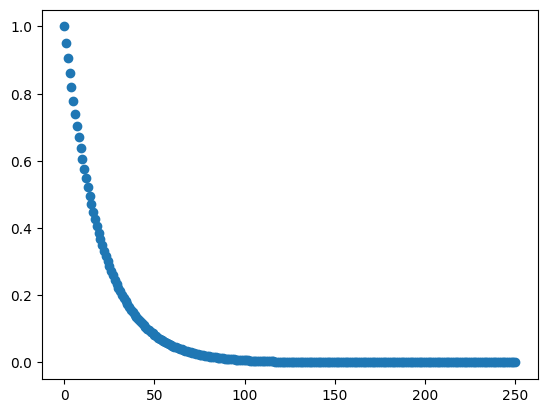

In [80]:
import matplotlib.pyplot as plt
plt.scatter(df["ID"],df["Probability"])

In [81]:
df.to_csv('sub8.csv', index=False)